In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [204]:
data=pd.read_csv('student_data.csv')
untouched_data=data.copy()
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [205]:
data.isna().sum()
data.replace({'F':True, 'M':False}, inplace=True)
data['sex'].head()
def refineBool(x):
    if x == 'yes':
        return True
    elif x == 'no':
        return False
    else:
        return x
yesNo=[]
for item in list(data):
    if data[item][0] == 'yes' or data[item][0] == 'no':
        yesNo.append(item)

for item in yesNo:
    data[item] = data[item].apply(refineBool)
data.head(10)

<ipython-input-205-071b5e267631>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'F':True, 'M':False}, inplace=True)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,True,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,True,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,True,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,True,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,True,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,False,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,False,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,True,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,False,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,False,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [206]:
def getMeanGrade(item):
  return item['G1']+item['G2']+item['G3']/3
data['grade_mean']=data.apply(getMeanGrade,axis=1)
untouched_data['grade_mean']=untouched_data.apply(getMeanGrade,axis=1)
data.head(10)
list(data.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'grade_mean']

In [207]:
# nonBoolNonNumeric=data.columns.difference(data.select_dtypes(['number', 'bool']).columns)
# data=pd.get_dummies(data,columns=nonBoolNonNumeric)
# data.head(10)

In [208]:
gradeMeanCorr=data.select_dtypes(['number', 'bool']).drop(['G1', 'G2', 'G3'], axis=1).corr(numeric_only=True)['grade_mean']

In [209]:
data.groupby('sex')['grade_mean'].mean()
#False=Male
#True=Female

,grade_mean
sex,
False,25.942959
True,24.331731


In [210]:
data.groupby('age')['grade_mean'].mean()


,grade_mean
age,
15,26.349593
16,25.801282
17,24.802721
18,24.036585
19,22.236111
20,32.000000
21,20.333333
22,16.666667


In [211]:
uniqueValues={}
for column in list(data.drop('grade_mean', axis=1)):
  uniqueValues[column]=len(np.unique(data[column]))/len(data[column])*100
for column in list(data.drop('grade_mean', axis=1)):
  if uniqueValues[column] > 3:
    data.drop(column, axis=1, inplace=True)
print(list(data))

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'grade_mean']


In [219]:
#fill missing values
data.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [213]:
# label encoding
nonBoolNonNumeric=data.columns.difference(data.select_dtypes(['number', 'bool']).columns)
nonBoolNonNumeric=(list(nonBoolNonNumeric))
# np.unique(data['Mjob'])
globalUniques={}
def labelEncode(column:str):
  global globalUniques
  temp=np.unique(data[column])
  uniques={}
  for i in range(len(temp)):
    uniques[temp[i]]=i
  globalUniques[column]=uniques
for column in nonBoolNonNumeric:
  labelEncode(column)
for column in nonBoolNonNumeric:
  data[column] = data[column].map(globalUniques[column])
display(data[nonBoolNonNumeric])


,Fjob,Mjob,Pstatus,address,famsize,guardian,reason,school
0,4,0,0,1,0,1,0,0
1,2,0,1,1,0,0,0,0
2,2,0,1,1,1,1,2,0
3,3,1,1,1,0,1,1,0
4,2,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
390,3,3,0,1,1,2,0,1
391,3,3,1,1,1,1,0,1
392,2,2,1,0,0,2,0,1
393,2,3,1,0,1,1,0,1


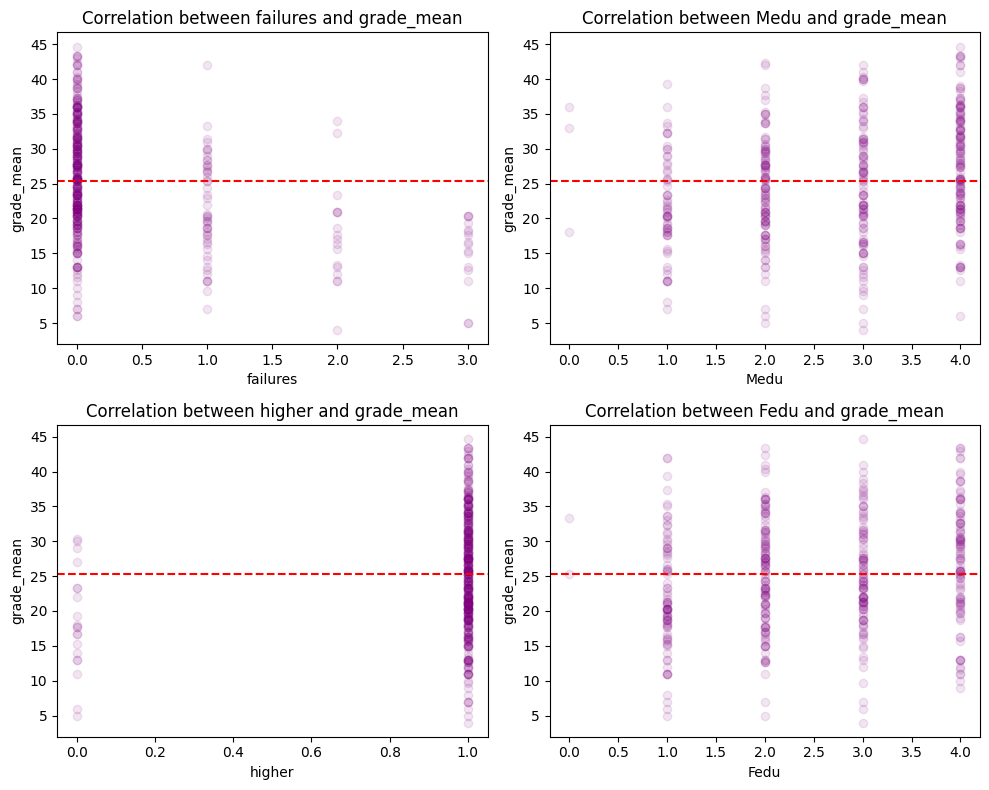

In [218]:
top_4 = gradeMeanCorr.drop('grade_mean').abs().sort_values(ascending=False).head(4)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

top_columns = top_4.index

for i, col in enumerate(top_columns):
    ax = axes[i//2, i%2]
    ax.scatter(data[col], data['grade_mean'], alpha=0.1, color='purple')
    ax.axhline(y=data['grade_mean'].median(), color='red', linestyle='--')
    ax.set_title(f'Correlation between {col} and grade_mean')
    ax.set_xlabel(col)
    ax.set_ylabel('grade_mean')

plt.tight_layout()
plt.show()

In [217]:
from collections import OrderedDict

def genSubsets(l):
    powerSetSize = 2 ** len(l)
    powerSet = []
    for i in range(1, powerSetSize):
        tempEle = []
        for j in range(len(l)):
            binFlagInd = i & (1 << j)
            if binFlagInd:
                tempEle.append(l[j])
        powerSet.append(tempEle)
    return powerSet

def genCandidate(Fk1):
    Ck = []
    k1 = len(Fk1[0])

    for i in range(len(Fk1) - 1):
        for j in range(i + 1, len(Fk1)):
            f1, f2 = Fk1[i], Fk1[j]

            if f1[:len(f1) - 1] == f2[:len(f2) - 1] and f1[-1] < f2[-1]:
                tempC = f1 + [f2[-1]]

                subset = genSubsets(tempC)
                appendSts = True
                for item in subset:
                    if len(item) == k1 and item not in Fk1:
                        appendSts = False
                if appendSts:
                    Ck.append(tempC)
    return Ck

def searchInT(t, candid):
    found = True
    for eachCandid in candid:
        if eachCandid not in t:
            found = False
    return found

def initPass(txList):
    allTx = [item for tx in txList for item in tx]
    allTx.sort()
    cntr = OrderedDict()
    for tx in allTx:
        cntr[tx] = cntr.get(tx, 0) + 1
    return cntr

def apriori(T, minSup):
    finalSet = []
    c1 = initPass(T)
    f = [[item] for item in c1.keys() if c1[item] / len(T) >= minSup]
    for item in f:
        finalSet.append(item)

    while len(f) != 0:
        Ck = genCandidate(f)
        freqDict = {}
        for t in T:
            for candidate in Ck:
                if searchInT(t, candidate):
                    freqDict[tuple(candidate)] = freqDict.get(tuple(candidate), 0) + 1
        f = []
        for c in freqDict.keys():
            if freqDict[c] / len(T) >= minSup:
                f.append(list(c))

        if len(f) != 0:
            f = sorted(f, key=lambda x: (len(x), *x))
            for item in f:
                finalSet.append(item)
    return finalSet

def generate_rules(frequent_itemsets, transactions, min_conf):
    rules = []
    N = len(transactions)

    support_count = {}
    for itemset in frequent_itemsets:
        count = 0
        for t in transactions:
            if all(i in t for i in itemset):
                count += 1
        support_count[tuple(itemset)] = count / N

    for itemset in frequent_itemsets:
        if len(itemset) < 2:
            continue

        subsets = genSubsets(itemset)
        for antecedent in subsets:
            if len(antecedent) == 0 or len(antecedent) == len(itemset):
                continue
            consequent = list(set(itemset) - set(antecedent))

            antecedent_support = support_count.get(tuple(sorted(antecedent)), 0)
            if antecedent_support == 0:
                continue

            rule_support = support_count.get(tuple(sorted(itemset)), 0)
            confidence = rule_support / antecedent_support

            if confidence >= min_conf:
                rules.append((antecedent, consequent, confidence))

    return rules

def apply_apriori_and_generate_rules(df, min_sup=0.8, min_conf=0.9):
    transactions = df.drop(columns=['grade_mean']).values.tolist()  # Kyuki grade_mean ke bare nikalna hai

    frequent_itemsets = apriori(transactions, min_sup)

    rules = generate_rules(frequent_itemsets, transactions, min_conf)

    return frequent_itemsets, rules

frequent_itemsets, rules = apply_apriori_and_generate_rules(data)

print("Frequent Itemsets:")
for itemset in frequent_itemsets:
    print(itemset)

print("\nGenerated Rules:")
for rule in rules:
    antecedent, consequent, confidence = rule
    print(f"{antecedent} => {consequent} (confidence = {confidence:.2f})")


Frequent Itemsets:
[0]
[True]
[2]
[3]
[4]
[5]
[0, True]
[0, 2]
[0, 3]
[0, 4]
[True, 2]
[True, 3]
[True, 4]
[2, 3]
[2, 4]
[3, 4]
[0, True, 2]
[0, True, 3]
[0, True, 4]
[0, 2, 3]
[0, 2, 4]
[0, 3, 4]
[True, 2, 3]
[True, 2, 4]
[True, 3, 4]
[0, True, 2, 3]
[0, True, 2, 4]
[0, True, 3, 4]

Generated Rules:
[0] => [True] (confidence = 1.00)
[True] => [0] (confidence = 1.00)
[0] => [2] (confidence = 0.97)
[2] => [0] (confidence = 1.00)
[0] => [3] (confidence = 0.94)
[3] => [0] (confidence = 1.00)
[4] => [0] (confidence = 1.00)
[True] => [2] (confidence = 0.97)
[2] => [True] (confidence = 1.00)
[True] => [3] (confidence = 0.94)
[3] => [True] (confidence = 1.00)
[4] => [True] (confidence = 1.00)
[2] => [3] (confidence = 0.94)
[3] => [2] (confidence = 0.97)
[4] => [2] (confidence = 0.97)
[4] => [3] (confidence = 0.93)
[0] => [True, 2] (confidence = 0.97)
[True] => [0, 2] (confidence = 0.97)
[0, True] => [2] (confidence = 0.97)
[2] => [0, True] (confidence = 1.00)
[0, 2] => [True] (confidence = 1.